In [7]:
# Importing module and assigning alias for them.
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#Defining funtion to parse date-time
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [3]:
series = read_csv('sales-of-shampoo.csv',delimiter=";",header=0,parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)

In [4]:
series.head()

1-01
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
Name: 266.0, dtype: float64

In [26]:
# Splitting the dataset into the Training set and Test set
X = series.values
size = int(len(X) * 0.66)
X_train, X_test, = X[0:size], X[size:len(X)]
print("X-TRAINING DATA:\n",X_train)
print("X-TEST DATA:\n",X_test)

X-TRAINING DATA:
 [145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9 194.3
 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3]
X-TEST DATA:
 [339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]


In [27]:
predictions = list()
#Iterating over test data
for t in range(len(X_test)):
    #model fitting to the training data set
    model = ARIMA(X_train, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predictions.append(output[0])
    observation = X_test[t]
    X_train = [x for x in X_train]
    X_train.append(observation)
    print('predicted=%f, expected=%f' % (output[0], observation))
error = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % error)

predicted=326.860810, expected=339.700000
predicted=391.723429, expected=440.400000
predicted=353.007412, expected=315.900000
predicted=385.696622, expected=439.300000
predicted=367.847652, expected=401.300000
predicted=448.604983, expected=437.400000
predicted=401.917986, expected=575.500000
predicted=429.887247, expected=407.600000
predicted=514.777979, expected=682.000000
predicted=442.026693, expected=475.300000
predicted=651.955318, expected=581.300000
predicted=561.306352, expected=646.900000
Test MSE: 6670.446


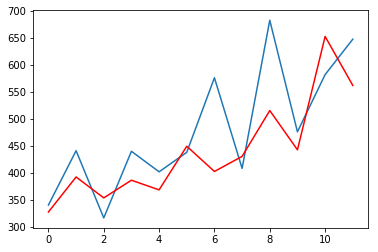

In [28]:
# plotting test and prediction data
pyplot.plot(X_test)
pyplot.plot(predictions, color='red')
pyplot.show()